In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import MESS
import numpy as np
import pandas as pd

from IPython.display import display

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


## Load the Weevil data

In [14]:
m_df = pd.read_csv("/home/iovercast/Continuosity/MESS/empirical_data/Mascarene_weevils/mauritius.dat", header=0, index_col=0)
r_df = pd.read_csv("/home/iovercast/Continuosity/MESS/empirical_data/Mascarene_weevils/reunion.dat", header=0, index_col=0)
print("Mauritius S:\t{}\tJ: {}".format(len(m_df), np.sum(m_df["abundance"])))
print("Reunion   S:\t{}\tJ: {}".format(len(r_df), np.sum(r_df["abundance"])))
print("S_m: {}".format(len(set(m_df.index).union(set(r_df.index)))))
display(m_df[:2])
display(r_df[:2])

Mauritius S:	26	J: 343.0
Reunion   S:	27	J: 539.0
S_m: 51


,pi,abundance
Cratopopsis_impressus,0.043741,4.0
Cratopopsis_mauritianus,0.002413,5.0


,pi,abundance
Cratopopsis_alluaudi,0.019174,12.0
Cratopopsis_antiquus,0.017928,11.0


## Run simulations 

In [15]:
for isl, df in zip(["Mauritius", "Reunion"], [m_df, r_df]):
    r = MESS.Region(isl)
    ## Region params
    r.set_param("project_dir", "./{}".format(isl))
    r.set_param("generations", 0)
    r.set_param("community_assembly_model", "*")
    r.set_param("mutation_rate", 2.2e-8)
    r.set_param("alpha", (1000, 10000))

    ## Metacommunity Params
    r.set_param("S_m", 51)
    r.set_param("J_m", 5e4)
    r.set_param("speciation_rate", 2)
    r.set_param("death_proportion", 0.7)
    r.set_param("trait_rate_meta", 2)
    r.set_param("ecological_strength", (0.001, 1))

    ## Local Params
    r.set_param("J", np.sum(df["abundance"]))
    r.set_param("m", (0.001, 0.01))
    r.set_param("speciation_prob", (0.0005, 0.005))

    r.write_params(full=True, force=True)


# Select the best model

In [20]:
simfile = "/home/iovercast/Continuosity/MESS/jupyter-notebooks/empirical/Mascarene_weevils/Mauritius/SIMOUT.txt"

## This just creates the Classifier. Feels goofy to pass in the m_df twice, but that's what we've got rn.
cla = MESS.inference.Classifier(empirical_df=m_df, simfile=simfile, algorithm="rf")
for isl, df in zip(["Mauritius", "Reunion"], [m_df, r_df]):
    cla.set_data(df)
    est, proba = cla.predict(select_features=True, param_search=True, quick=False, verbose=False)
    cla.dump(outfile="{}/{}_classifier.mdl".format(isl, isl))
    display(isl, est, proba)
    display(cla.feature_importances())


'Mauritius'

,community_assembly_model
estimate,neutral


,competition,filtering,neutral
community_assembly_model,0.313155,0.120736,0.566109


,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,abundance_pi_cor,SGD_0,SGD_5
Feature importance,0.044444,0.119031,0.092944,0.08628,0.087185,0.058468,0.050788,0.047809,0.043205,0.057178,0.081624,0.037167,0.03934,0.013411,0.031008,0.077548,0.021998,0.010571


'Reunion'

,community_assembly_model
estimate,neutral


,competition,filtering,neutral
community_assembly_model,0.336089,0.099968,0.563943


,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,abundance_pi_cor,SGD_0,SGD_5
Feature importance,0.044444,0.119031,0.092944,0.08628,0.087185,0.058468,0.050788,0.047809,0.043205,0.057178,0.081624,0.037167,0.03934,0.013411,0.031008,0.077548,0.021998,0.010571


array([<matplotlib.axes._subplots.AxesSubplot object at 0x2aab6fd89bd0>],
      dtype=object)

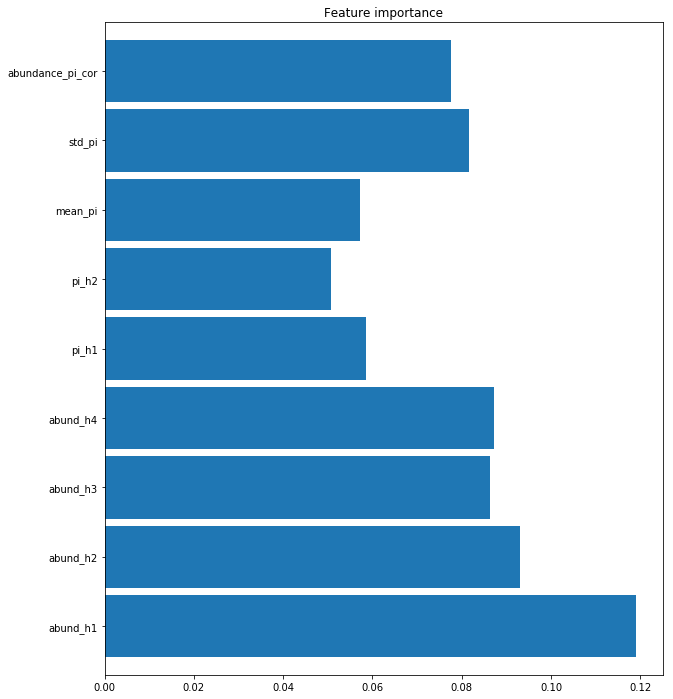

In [21]:
cla.plot_feature_importance()

# Estimate parameters

In [22]:
rgr = MESS.inference.Regressor(empirical_df=m_df, simfile=simfile, target_model="neutral", algorithm="rfq")
for isl, df in zip(["Mauritius", "Reunion"], [m_df, r_df]):
    rgr.set_data(df)
    est = rgr.predict(select_features=True, param_search=True, quick=False, verbose=False)
    rgr.dump(outfile="{}/{}_regressor.mdl".format(isl, isl))
    display(isl, est, rgr.feature_importances())

  NB: No features found relevant for target ecological_strength
      Fall back to using all parameters.


'Mauritius'

,alpha,ecological_strength,m,generation,speciation_prob,_lambda
estimate,7107.251038,0.390940,0.007028,1259.572400,0.002600,0.933514
lower 0.025,3496.731182,0.001662,0.002072,402.724946,0.000599,0.804230
upper 0.975,9831.388833,0.995216,0.009649,3590.324978,0.004940,1.000000


,S,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9,abund_h1,abund_h2,abund_h3,abund_h4,abundance_pi_cor,iqr_pi,kurtosis_pi,mean_pi,median_pi,pi_h1,pi_h2,pi_h3,pi_h4,skewness_pi,std_pi,trees
alpha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.163709,0.108986,0.119143,0.193365,0.093155,NaN,0.177667,NaN,0.143976,NaN,NaN,NaN,NaN,NaN,NaN
ecological_strength,0.027280,0.015668,0.014403,0.006993,0.010242,0.008738,0.014982,0.013459,0.005483,0.004996,0.00334,0.106545,0.075235,0.061836,0.072469,0.115497,0.049962,0.065009,0.058031,0.021953,0.033040,0.02809,0.026963,0.039682,0.058495,0.061609,0.0
m,0.349056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.323773,NaN,NaN,NaN,0.166667,NaN,0.160504,NaN,NaN,NaN,NaN,NaN,NaN
generation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.165817,0.215982,NaN,NaN,NaN,0.446162,NaN,NaN,NaN,NaN,NaN,NaN,0.172040,NaN
speciation_prob,0.488149,0.036437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.146736,NaN,NaN,NaN,0.099822,0.043124,NaN,0.115958,NaN,NaN,NaN,NaN,NaN,NaN,0.069774,NaN
_lambda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.018238,0.032329,0.173200,0.633031,0.021605,0.012394,NaN,0.068438,NaN,0.019120,NaN,NaN,NaN,NaN,0.021645,NaN


'Reunion'

,alpha,ecological_strength,m,generation,speciation_prob,_lambda
estimate,7178.213886,0.415004,0.007028,1259.572400,0.002689,0.929886
lower 0.025,3506.795296,0.001670,0.002072,402.724946,0.000588,0.802309
upper 0.975,9823.660937,0.996648,0.009649,3590.324978,0.004940,1.000000


,S,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9,abund_h1,abund_h2,abund_h3,abund_h4,abundance_pi_cor,iqr_pi,kurtosis_pi,mean_pi,median_pi,pi_h1,pi_h2,pi_h3,pi_h4,skewness_pi,std_pi,trees
alpha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.163709,0.108986,0.119143,0.193365,0.093155,NaN,0.177667,NaN,0.143976,NaN,NaN,NaN,NaN,NaN,NaN
ecological_strength,0.027280,0.015668,0.014403,0.006993,0.010242,0.008738,0.014982,0.013459,0.005483,0.004996,0.00334,0.106545,0.075235,0.061836,0.072469,0.115497,0.049962,0.065009,0.058031,0.021953,0.033040,0.02809,0.026963,0.039682,0.058495,0.061609,0.0
m,0.349056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.323773,NaN,NaN,NaN,0.166667,NaN,0.160504,NaN,NaN,NaN,NaN,NaN,NaN
generation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.165817,0.215982,NaN,NaN,NaN,0.446162,NaN,NaN,NaN,NaN,NaN,NaN,0.172040,NaN
speciation_prob,0.488149,0.036437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.146736,NaN,NaN,NaN,0.099822,0.043124,NaN,0.115958,NaN,NaN,NaN,NaN,NaN,NaN,0.069774,NaN
_lambda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.018238,0.032329,0.173200,0.633031,0.021605,0.012394,NaN,0.068438,NaN,0.019120,NaN,NaN,NaN,NaN,0.021645,NaN


# Trash below here

Removed invariant targets. Retained: ['S', 'abund_h1', 'abund_h2', 'abund_h3', 'abund_h4', 'pi_h1', 'pi_h2', 'pi_h3', 'pi_h4', 'mean_pi', 'std_pi', 'skewness_pi', 'kurtosis_pi', 'median_pi', 'iqr_pi', 'mean_dxys', 'std_dxys', 'skewness_dxys', 'kurtosis_dxys', 'median_dxys', 'iqr_dxys', 'trait_h1', 'trait_h2', 'trait_h3', 'trait_h4', 'mean_local_traits', 'std_local_traits', 'skewness_local_traits', 'kurtosis_local_traits', 'median_local_traits', 'iqr_local_traits', 'mean_regional_traits', 'std_regional_traits', 'skewness_regional_traits', 'kurtosis_regional_traits', 'median_regional_traits', 'iqr_regional_traits', 'reg_loc_mean_trait_dif', 'reg_loc_std_trait_dif', 'reg_loc_skewness_trait_dif', 'reg_loc_kurtosis_trait_dif', 'reg_loc_median_trait_dif', 'reg_loc_iqr_trait_dif', 'abundance_dxy_cor', 'abundance_pi_cor', 'abundance_trait_cor', 'dxy_pi_cor', 'dxy_trait_cor', 'pi_trait_cor', 'SGD_0', 'SGD_1', 'SGD_2', 'SGD_3', 'SGD_4', 'SGD_5', 'SGD_6', 'SGD_7', 'SGD_8', 'SGD_9']
Nsims
  neutra

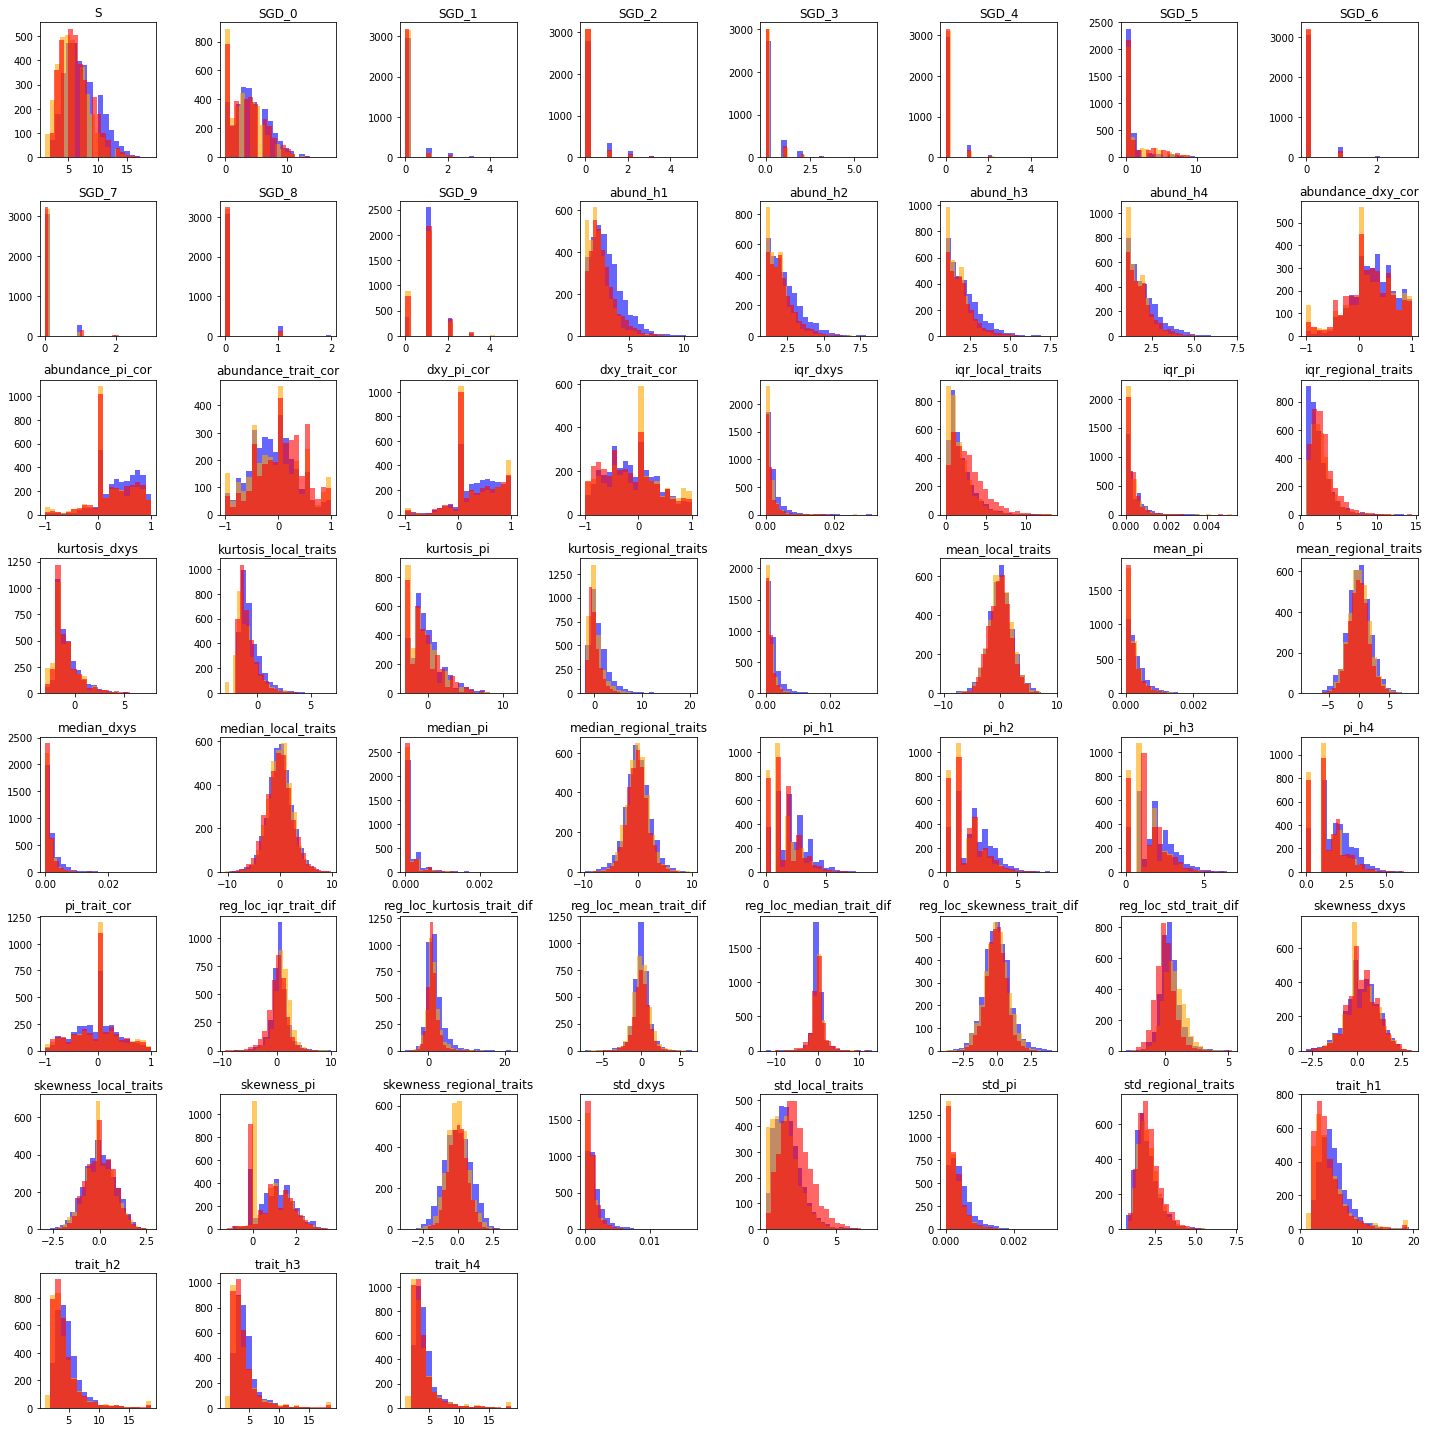

In [7]:
simfile = "/home/iovercast/Continuosity/MESS/jupyter-notebooks/empirical/Mascarene_weevils/Mauritius/SIMOUT.txt"
_ = MESS.plotting.plot_simulations_hist(simfile, figsize=(20, 20), nsims=10000, verbose=True)